# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

#I added these
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city = "London"

response = requests.get(query_url+city).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 51.5085, 'lon': -0.1257},
 'dt': 1707518805,
 'id': 2643743,
 'main': {'feels_like': 9.82,
          'humidity': 93,
          'pressure': 979,
          'temp': 10.31,
          'temp_max': 11.11,
          'temp_min': 9.39},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 2075535,
         'sunrise': 1707463610,
         'sunset': 1707498159,
         'type': 2},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 229, 'gust': 4.02, 'speed': 2.24}}


In [4]:

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

#I added these
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []



# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city #I did this from above
    #print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        #city_weather = reponse # I did this from above
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})


            
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | haapsalu
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | beshkent
Processing Record 4 of Set 1 | aykhal
Processing Record 5 of Set 1 | menongue
Processing Record 6 of Set 1 | dalandzadgad
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | cannonvale
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | vila velha
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | san pedro pochutla
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | mamonovo
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | minas de marcona
Processing Record 21 of Set 1 | vernon
Processing Record 22 of Set 1 | tralee
Proce

Processing Record 39 of Set 4 | barra de santo antonio
Processing Record 40 of Set 4 | aasiaat
Processing Record 41 of Set 4 | loreto
Processing Record 42 of Set 4 | dibba al-hisn
Processing Record 43 of Set 4 | at taj
Processing Record 44 of Set 4 | ampanihy
Processing Record 45 of Set 4 | marka
Processing Record 46 of Set 4 | okha
Processing Record 47 of Set 4 | puerto ayora
Processing Record 48 of Set 4 | serov
Processing Record 49 of Set 4 | gao
Processing Record 0 of Set 5 | tangalle
Processing Record 1 of Set 5 | nova vicosa
Processing Record 2 of Set 5 | cabedelo
Processing Record 3 of Set 5 | ulsteinvik
Processing Record 4 of Set 5 | sandnessjoen
Processing Record 5 of Set 5 | ketchikan
Processing Record 6 of Set 5 | port alfred
Processing Record 7 of Set 5 | yei
Processing Record 8 of Set 5 | fort mcmurray
Processing Record 9 of Set 5 | bossangoa
Processing Record 10 of Set 5 | ixtapa
Processing Record 11 of Set 5 | kaa-khem
Processing Record 12 of Set 5 | gaspe
Processing Rec

Processing Record 31 of Set 8 | quang ngai
Processing Record 32 of Set 8 | kotlas
Processing Record 33 of Set 8 | bowie
Processing Record 34 of Set 8 | bagnols-sur-ceze
Processing Record 35 of Set 8 | acarau
Processing Record 36 of Set 8 | santa cruz del norte
Processing Record 37 of Set 8 | vezirkopru
Processing Record 38 of Set 8 | chyorny yar
Processing Record 39 of Set 8 | san antonio del estrecho
City not found. Skipping...
Processing Record 40 of Set 8 | birobidzhan
Processing Record 41 of Set 8 | korla
Processing Record 42 of Set 8 | mulanje
Processing Record 43 of Set 8 | tachilek
City not found. Skipping...
Processing Record 44 of Set 8 | thunder bay
Processing Record 45 of Set 8 | ocean pointe
City not found. Skipping...
Processing Record 46 of Set 8 | ambon
Processing Record 47 of Set 8 | nasir
Processing Record 48 of Set 8 | barmer
Processing Record 49 of Set 8 | zhangye
Processing Record 0 of Set 9 | clarkston heights-vineland
Processing Record 1 of Set 9 | kargasok
Proces

Processing Record 16 of Set 12 | comilla
Processing Record 17 of Set 12 | torghay
Processing Record 18 of Set 12 | pandan
Processing Record 19 of Set 12 | mamburao
Processing Record 20 of Set 12 | broken hill
Processing Record 21 of Set 12 | kievka
Processing Record 22 of Set 12 | sonsorol village
City not found. Skipping...
Processing Record 23 of Set 12 | lamego
Processing Record 24 of Set 12 | tarinkot
Processing Record 25 of Set 12 | iyo
Processing Record 26 of Set 12 | saint-jean-de-monts
Processing Record 27 of Set 12 | dwarka
Processing Record 28 of Set 12 | ocara
Processing Record 29 of Set 12 | sinabang
Processing Record 30 of Set 12 | san jose de jachal
Processing Record 31 of Set 12 | nuestra senora del rosario de caa cati
Processing Record 32 of Set 12 | yagry
City not found. Skipping...
Processing Record 33 of Set 12 | quelimane
Processing Record 34 of Set 12 | kununurra
Processing Record 35 of Set 12 | tynda
Processing Record 36 of Set 12 | canutama
Processing Record 37 o

In [5]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [6]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,haapsalu,58.9431,23.5414,-11.16,82,4,4.11,EE,1707519100
1,albany,42.6001,-73.9662,10.23,64,11,0.89,US,1707519101
2,beshkent,38.8214,65.6531,7.10,45,0,2.06,UZ,1707519101
3,aykhal,66.0000,111.5000,-33.32,100,100,1.71,RU,1707519101
4,menongue,-14.6585,17.6910,18.14,94,29,1.06,AO,1707519101


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,haapsalu,58.9431,23.5414,-11.16,82,4,4.11,EE,1707519100
1,albany,42.6001,-73.9662,10.23,64,11,0.89,US,1707519101
2,beshkent,38.8214,65.6531,7.10,45,0,2.06,UZ,1707519101
3,aykhal,66.0000,111.5000,-33.32,100,100,1.71,RU,1707519101
4,menongue,-14.6585,17.6910,18.14,94,29,1.06,AO,1707519101


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

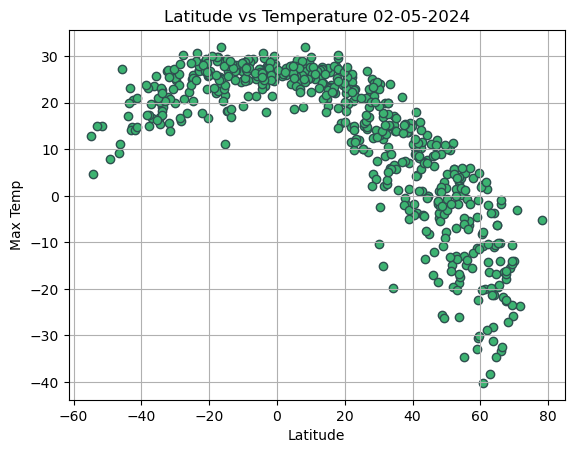

In [9]:
# Build scatter plot for latitude vs. temperature
lat_values = city_data_df["Lat"]
temp_values = city_data_df["Max Temp"]

plt.scatter(lat_values, temp_values, marker = "o", edgecolors="darkslategrey", facecolors="mediumseagreen")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Temperature 02-05-2024")
# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

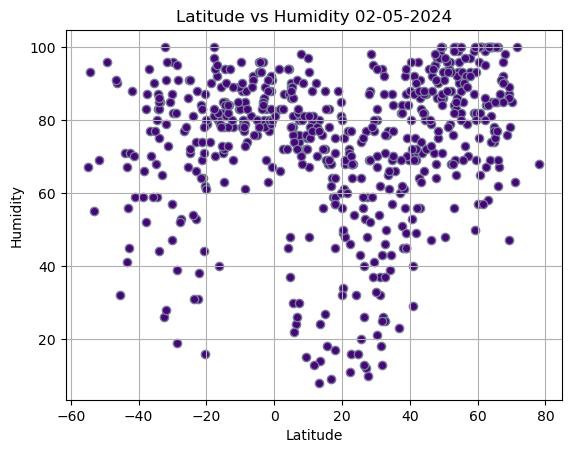

In [10]:
# Build the scatter plots for latitude vs. humidity
lat_values = city_data_df["Lat"]
humid_values = city_data_df["Humidity"]

plt.scatter(lat_values, humid_values, marker = "o", edgecolors="slategrey", facecolors="indigo")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity 02-05-2024")
# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

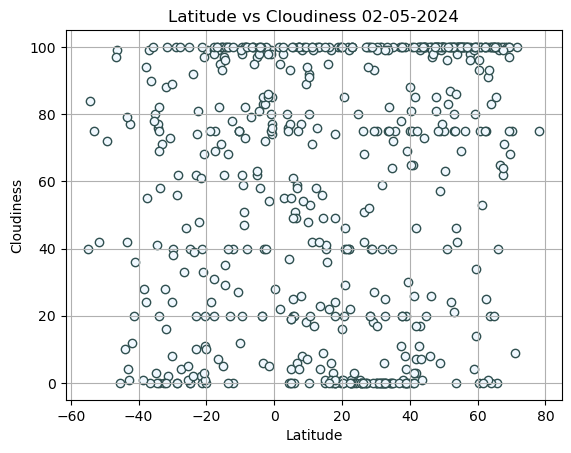

In [11]:
# Build the scatter plots for latitude vs. cloudiness
lat_values = city_data_df["Lat"]
cloud_values = city_data_df["Cloudiness"]

plt.scatter(lat_values, cloud_values, marker = "o", edgecolors="darkslategray", facecolors="aliceblue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness 02-05-2024")
# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

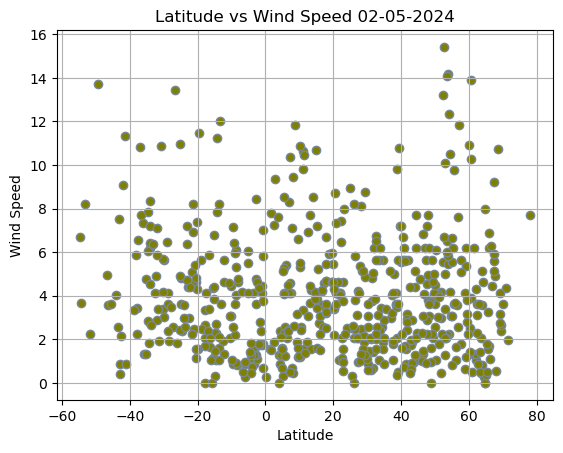

In [12]:
# Build the scatter plots for latitude vs. wind speed
lat_values = city_data_df["Lat"]
wind_values = city_data_df["Wind Speed"]

plt.scatter(lat_values, wind_values, marker = "o", edgecolors="lightslategray", facecolors="olive")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed 02-05-2024")
# Incorporate the other graph properties
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# I did this a different way
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

NameError: name 'x_values' is not defined

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,haapsalu,58.9431,23.5414,-11.16,82,4,4.11,EE,1707519100
1,albany,42.6001,-73.9662,10.23,64,11,0.89,US,1707519101
2,beshkent,38.8214,65.6531,7.10,45,0,2.06,UZ,1707519101
3,aykhal,66.0000,111.5000,-33.32,100,100,1.71,RU,1707519101
5,dalandzadgad,43.5708,104.4250,-13.65,71,1,0.93,MN,1707519101


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,menongue,-14.6585,17.6910,18.14,94,29,1.06,AO,1707519101
6,port-aux-francais,-49.3500,70.2167,7.90,96,72,13.73,TF,1707519101
7,cannonvale,-20.2833,148.7000,25.66,62,11,7.38,AU,1707519102
8,grytviken,-54.2811,-36.5092,4.60,93,84,3.66,GS,1707519102
9,vila velha,-20.3297,-40.2925,26.08,87,20,4.63,BR,1707519102


###  Temperature vs. Latitude Linear Regression Plot

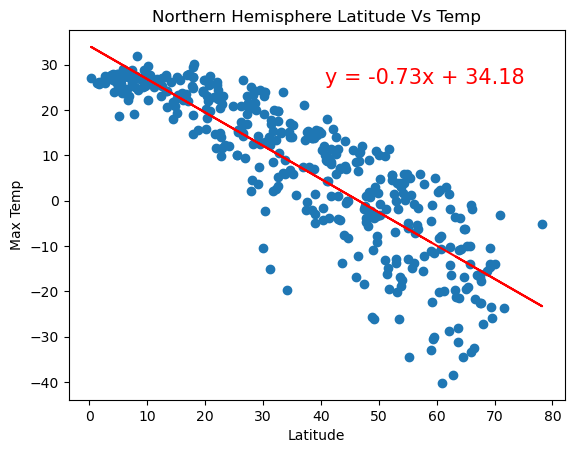

The r value is: -0.8642221065117746


In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(40.8,25.8),fontsize=15,color="red")
plt.title("Northern Hemisphere Latitude Vs Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
print(f"The r value is: {rvalue}")

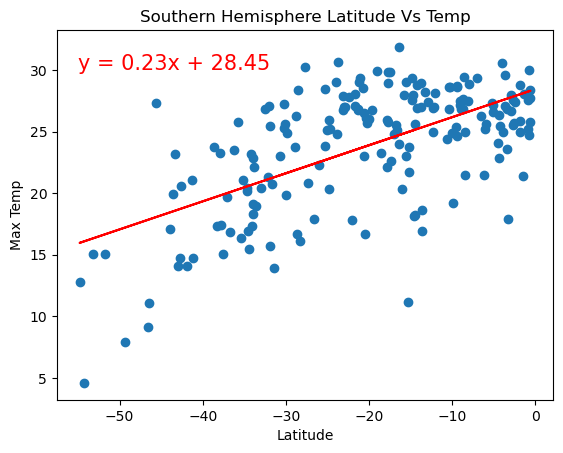

The r value is: 0.6163590444549697


In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere Latitude Vs Temp")
plt.show()
print(f"The r value is: {rvalue}")

**Discussion about the linear relationship:** Based on the scatter plots and the r value, the northern hemisphere has a strong corelation between max temp and latitude. The scatter plot and r value for the southern hemisphere shows a moderate correlation. All in all, the data shows that the closer to 0 the latitude is, the higher the temperature.

### Humidity vs. Latitude Linear Regression Plot

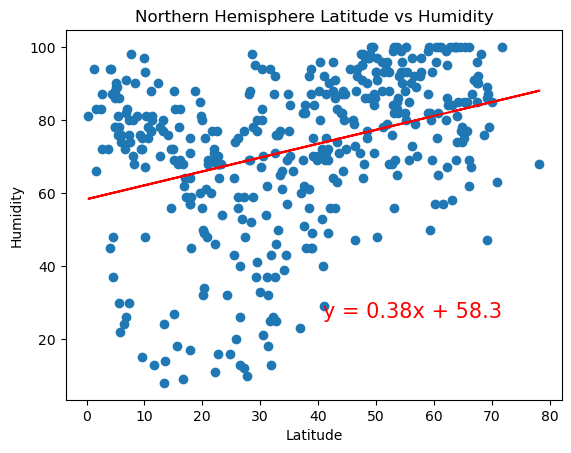

The r value is: 0.3442640872991266


In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(40.8,25.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Latitude vs Humidity")
plt.show()
print(f"The r value is: {rvalue}")

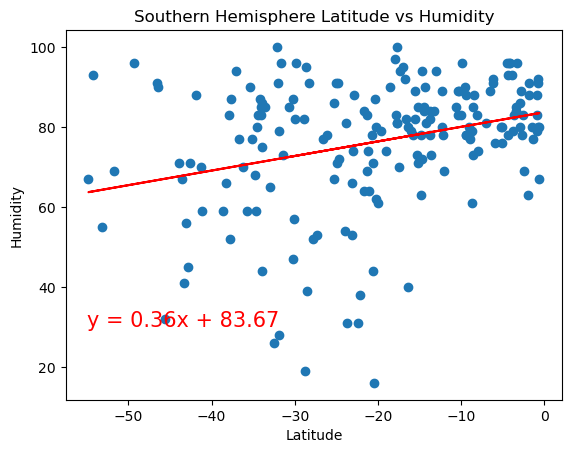

The r value is: 0.30047743738106486


In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Latitude vs Humidity")
plt.show()
print(f"The r value is: {rvalue}")

**Discussion about the linear relationship:** Based on the graphs and the r values, there is a weak correlation between latitude and humidity. In general, the closer to the equator a location is, the more humid it is, but this is a weak statement. Conversely, the humidity increases the farther away from the equator a location is. 

### Cloudiness vs. Latitude Linear Regression Plot

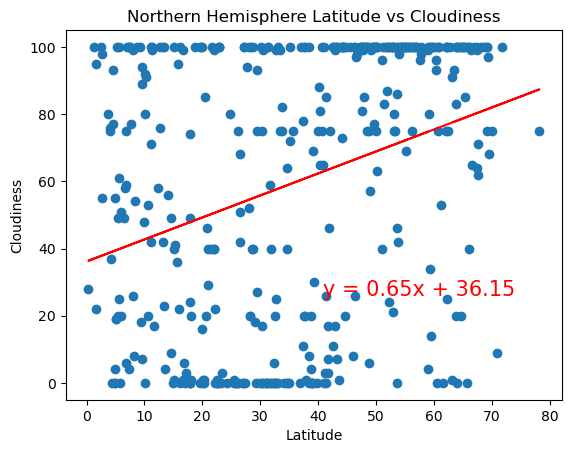

The r value is: 0.316100759647061


In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(40.8,25.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere Latitude vs Cloudiness")
plt.show()
print(f"The r value is: {rvalue}")

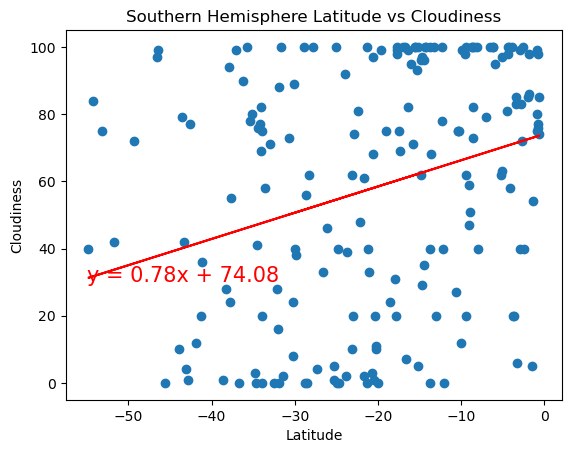

The r value is: 0.28973721863840524


In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere Latitude vs Cloudiness")
plt.show()
print(f"The r value is: {rvalue}")

**Discussion about the linear relationship:** Based on the scatter plots and the r values, there is no real correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

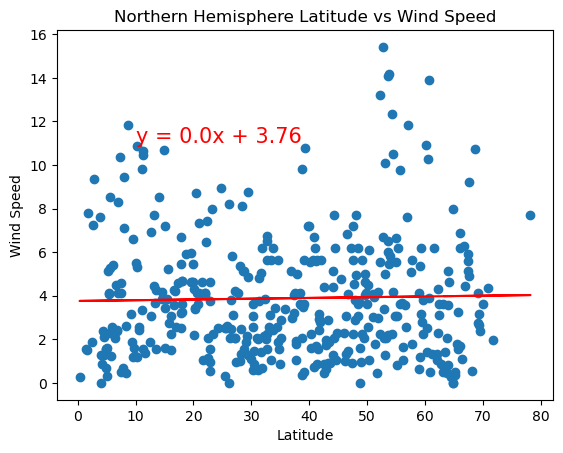

The r value is: 0.024184063211643243


In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10,11),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere Latitude vs Wind Speed")
plt.show()
print(f"The r value is: {rvalue}")

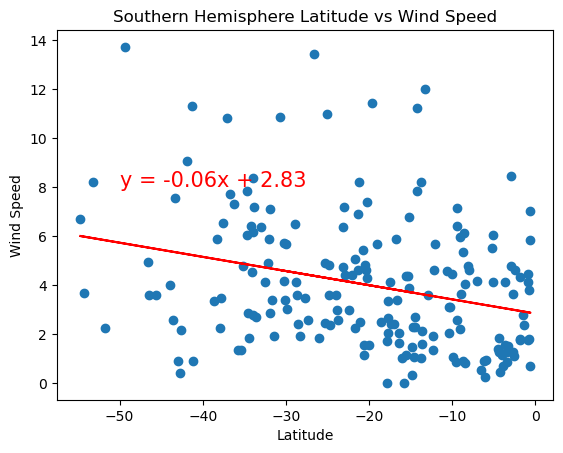

The r value is: -0.28464731669485194


In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere Latitude vs Wind Speed")
plt.show()
print(f"The r value is: {rvalue}")

**Discussion about the linear relationship:** Based on the scatter plots and the r values, there is not a strong correlation between latitude and wind speed. The speed seems to stay the same in general regardless of the latitude. The southern hemisphere has a stronger correlation than the northern hemisphere, but it is still weak.